# **Task 4: Churn Prediction Model**

# 1. Load and Clean the Dataset


```
1.1 Import Libraries
1.2 Data From GitHub
1.3 Check the missing values
1.4 Convert TotalCharges to Numeric
1.5 Fill the missing value with median
1.6 Also Check the " " value
1.7 Convert types
```



In [73]:
# 1.1 Import Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# 1.2 Data From GitHub

# GitHub raw URL
url = 'https://raw.githubusercontent.com/abuthahir17/Dataset/main/Telco_Customer_Churn_Dataset.csv'

# Read CSV file
data = pd.read_csv(url)

print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [75]:
# 1.3 Check the missing values
data.replace(" ", None, inplace=True)
print("Missing Value: \n", data.isnull().sum())

Missing Value: 
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [76]:
# 1.4 Convert TotalCharges to Numeric
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [77]:
# 1.5 Fill the missing value with median
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())

In [78]:
# 1.6 Also Check the " " value
data.replace(" ", None, inplace=True)
print("Missing Value after Cleaning: \n", data.isnull().sum())

Missing Value after Cleaning: 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [79]:
# 1.7 Convert types
data["Churn"] = data["Churn"].map({"Yes":1, "No":0})

# 2. Encoding Categorical Variables



```
2.1 Identify Numerical and Categorical Columns
2.2 Before Encoding
2.3 During Encoding
2.4 After Encoding
```



In [80]:
# 2.1 Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Total number of Numerical Columns:", len(numerical_cols))
print("All Numerical Columns:" ,list(numerical_cols), "\n")

# 2.1 Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Total number of Categorical Columns:", len(categorical_cols))
print("All Categorical Columns:" , list(categorical_cols))

Total number of Numerical Columns: 5
All Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Total number of Categorical Columns: 16
All Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [81]:
# 2.2 Before Encoding

print("Before encoding:\n", data.head())
print("Shape before encoding:", data.shape)

Before encoding:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies   

In [82]:
# 2.3 During Encoding

from sklearn.preprocessing import LabelEncoder

# Binary columns (2 unique values)
binary_cols = [col for col in categorical_cols if data[col].nunique() == 2]
print("Binary Columns (LabelEncode):", binary_cols, "\n")

# Multi-category columns (>2 unique values)
multi_cat_cols = [col for col in categorical_cols if data[col].nunique() > 2 and col not in binary_cols]
print("Multi-category Columns (One-hot Encode):", multi_cat_cols, "\n")

label_encoder = LabelEncoder()

# Binary
for col in binary_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Multi-Category (One-Hot Encoding)
data = pd.get_dummies(data, columns=multi_cat_cols, drop_first=True)

print("Categorical Encoding Completed.")

Binary Columns (LabelEncode): ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'] 

Multi-category Columns (One-hot Encode): ['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'] 

Categorical Encoding Completed.


In [83]:
# 2.4 After Encoding

print("After encoding:\n", data.head())
print("New Shape After Encoding:", data.shape)

After encoding:
    gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1            False   

# 3. Dataset Splitting (Train/Test)


```
3.1 Fix the target variable
3.2 Split the Dataset
```



In [84]:
#3.1 Fix the target variable
from sklearn.model_selection import train_test_split

# Target variable
X = data.drop("Churn", axis=1)
y = data["Churn"]

In [85]:
# 3.2 Split the dataset into 2 set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 7072)
Testing set shape: (1409, 7072)


# 4. Standardize Numerical Features

In [86]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale only if columns exist in X (safety)
num_cols = [c for c in num_cols if c in X_train.columns]

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 5. Fix class imbalance on training set using SMOTE

In [87]:
from imblearn.over_sampling import SMOTE

# Synthetic Minority Oversampling Technique (SMOTE) -> To fix class imbalance in your churn dataset.

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("After SMOTE ->", X_train_sm.shape, y_train_sm.sum(), "positive samples")

After SMOTE -> (8278, 7072) 4139 positive samples


# 6. Model Training



```
6.1 Logistic Regression
6.2 Decision Tree
6.3 Random Forest
```



In [88]:
# 6.1 Logistic Regression

log = LogisticRegression(max_iter=1000, random_state=42)
log.fit(X_train_sm, y_train_sm)
y_pred_log = log.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.62      0.59       374

    accuracy                           0.78      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [89]:
# 6.2 Decision Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sm, y_train_sm)
y_pred_tree = dt.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1035
           1       0.57      0.60      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.78      1409



In [90]:
# 6.3 Random Forest

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.61      0.61      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409



# 7. Hyperparameter tuning for RandomForest (GridSearchCV)

In [91]:
# Hyperparameter Tuning (Decision Tree Example)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_sm, y_train_sm)
best_rf = grid.best_estimator_
print("\nGridSearch best params:", grid.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits

GridSearch best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


# 8. Tuned Random Forest Evaluation


```
8.1 Classification Report of Tuned Random Forest
8.2 Confusion Matrix of Tuned Random Forest
8.3 ROC Curve and AUC Score
```



In [92]:
# 8.1 Classification Report of Tuned Random Forest
y_pred_best = best_rf.predict(X_test)
print("\nTuned Random Forest:\n", classification_report(y_test, y_pred_best))


Tuned Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.61      0.61      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409



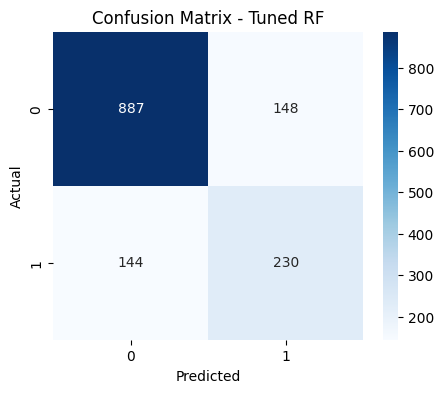

In [93]:
# 8.2 Confusion Matrix of Tuned Random Forest
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned RF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

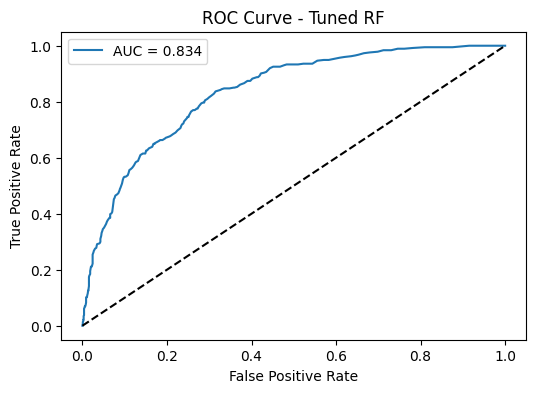

In [94]:
# 8.3 ROC Curve and AUC Score
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve - Tuned RF")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 9. Feature Importance

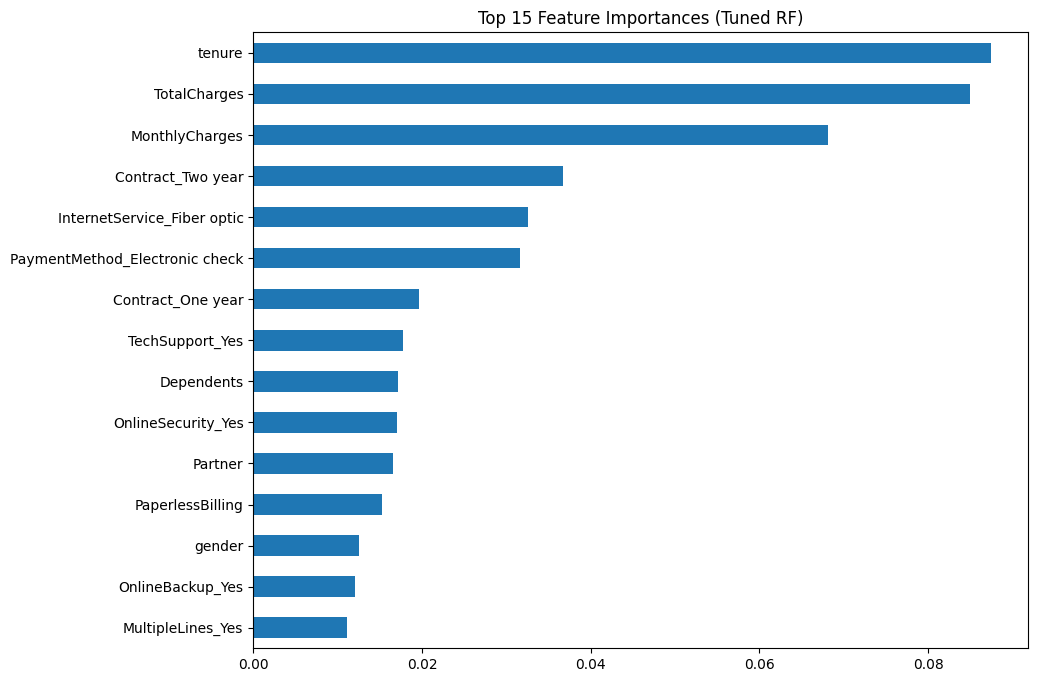

In [95]:
# Feature Importance (Random Forest)

importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_imp = importances.sort_values(ascending=False).head(15)
plt.figure(figsize=(10,8))
top_imp.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Tuned RF)")
plt.show()

# 10. Final comparison table

In [96]:
# 10. Final comparison

def evaluate(name, y_true, y_pred):
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall   :", recall_score(y_true, y_pred, zero_division=0))
    print("F1 Score :", f1_score(y_true, y_pred, zero_division=0))

evaluate("Logistic Regression", y_test, y_pred_log)
evaluate("Decision Tree", y_test, y_pred_tree)
evaluate("Random Forest (baseline)", y_test, y_pred_rf)
evaluate("Random Forest (tuned)", y_test, y_pred_best)


Logistic Regression
Accuracy : 0.7757274662881476
Precision: 0.5714285714285714
Recall   : 0.6203208556149733
F1 Score : 0.5948717948717949

Decision Tree
Accuracy : 0.7735982966643009
Precision: 0.569620253164557
Recall   : 0.6016042780748663
F1 Score : 0.5851755526657998

Random Forest (baseline)
Accuracy : 0.7927608232789212
Precision: 0.6084656084656085
Recall   : 0.6149732620320856
F1 Score : 0.6117021276595744

Random Forest (tuned)
Accuracy : 0.7927608232789212
Precision: 0.6084656084656085
Recall   : 0.6149732620320856
F1 Score : 0.6117021276595744
